## Imports

In [1]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [2]:
import unlimtd_f
import time
from jax import random
import dataset_multi_infinite
import dataset_sines_infinite
import dataset_lines_infinite
import test
import plots
import ntk
import nll
from jax import numpy as np
import pickle
import models
import utils
from matplotlib import pyplot as plt

## Option #1: training the network in this notebook

In [3]:
seed = 1655235988902897757
print(seed)

1655235988902897757


In [4]:
init_params, pre_state, pre_evals, post_state, pre_losses, post_losses, post_evals = unlimtd_f.unlimtd_f_multi_modal_singGP(seed=seed,
                                                                                     pre_n_epochs=30000,
                                                                                     pre_n_tasks=24,
                                                                                     pre_K=10,
                                                                                     post_n_epochs=30000,
                                                                                     post_n_tasks=24,
                                                                                     post_K=10,
                                                                                     data_noise=0.05, 
                                                                                     maddox_noise=0.05,
                                                                                     meta_lr=0.001,
                                                                                     subspace_dimension=10)

2022-08-27 13:47:22.112889: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib
2022-08-27 13:47:22.113319: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


This is UNLIMTD-F
For the multi-modal dataset: sine + line (both infinite)
This variant of UNLIMTD-F approaches the distribution with a single GP
Creating model
Creating optimizers
Starting first part of training (identity covariance)
Starting training with:
-n_epochs=30000
-n_tasks=24
-K=10
-data_noise=0.05
-maddox_noise=0.05
0  | 893.0116 (5.1253 s)
Eval: (DeviceArray(882.2309, dtype=float32), DeviceArray(2.448233, dtype=float32))
10  | 317.4789 (0.0275 s)
20  | 292.8121 (0.0235 s)
30  | 188.4886 (0.0165 s)
40  | 164.5755 (0.0209 s)
50  | 91.7973 (0.0170 s)
60  | 65.6677 (0.0182 s)
70  | 28.4761 (0.0194 s)
80  | 70.8053 (0.0247 s)
90  | 43.4758 (0.0140 s)
100  | 34.7697 (0.0180 s)
110  | 30.6383 (0.0156 s)
120  | 41.6060 (0.0246 s)
130  | 21.3166 (0.0183 s)
140  | 39.1074 (0.0246 s)
150  | 22.5972 (0.0203 s)
160  | 30.4676 (0.0190 s)
170  | 18.0368 (0.0187 s)
180  | 25.5317 (0.0153 s)
190  | 16.8071 (0.0186 s)
200  | 16.5410 (0.0223 s)
210  | 31.8148 (0.0192 s)
220  | 23.3882 (0.0219

2820  | 4.5379 (0.0205 s)
2830  | 4.5253 (0.0145 s)
2840  | 5.8031 (0.0139 s)
2850  | 4.4110 (0.0248 s)
2860  | 5.2801 (0.0153 s)
2870  | 7.0152 (0.0217 s)
2880  | 5.5612 (0.0176 s)
2890  | 6.1271 (0.0167 s)
2900  | 6.0883 (0.0226 s)
2910  | 6.0245 (0.0226 s)
2920  | 4.1534 (0.0163 s)
2930  | 4.5709 (0.0227 s)
2940  | 5.8212 (0.0188 s)
2950  | 4.6883 (0.0230 s)
2960  | 5.3803 (0.0141 s)
2970  | 6.4328 (0.0249 s)
2980  | 6.3683 (0.0162 s)
2990  | 6.0604 (0.0139 s)
3000  | 4.4239 (0.0137 s)
Eval: (DeviceArray(5.2749896, dtype=float32), DeviceArray(0.04681728, dtype=float32))
3010  | 6.4542 (0.0197 s)
3020  | 5.0837 (0.0126 s)
3030  | 5.2161 (0.0194 s)
3040  | 4.8204 (0.0238 s)
3050  | 4.4384 (0.0208 s)
3060  | 4.7897 (0.0173 s)
3070  | 5.4936 (0.0236 s)
3080  | 5.9135 (0.0145 s)
3090  | 6.5547 (0.0214 s)
3100  | 5.0487 (0.0210 s)
3110  | 6.1772 (0.0218 s)
3120  | 4.8408 (0.0140 s)
3130  | 5.5668 (0.0154 s)
3140  | 5.2340 (0.0148 s)
3150  | 6.7450 (0.0146 s)
3160  | 4.5461 (0.0193 s)
3170

5780  | 4.1684 (0.0134 s)
5790  | 4.5682 (0.0141 s)
5800  | 4.2180 (0.0142 s)
5810  | 5.6015 (0.0188 s)
5820  | 5.5960 (0.0176 s)
5830  | 5.4341 (0.0202 s)
5840  | 4.8525 (0.0241 s)
5850  | 5.5770 (0.0233 s)
5860  | 5.2646 (0.0257 s)
5870  | 4.1235 (0.0195 s)
5880  | 4.1592 (0.0178 s)
5890  | 3.5345 (0.0188 s)
5900  | 3.9711 (0.0197 s)
5910  | 4.7036 (0.0174 s)
5920  | 5.3517 (0.0153 s)
5930  | 4.2818 (0.0154 s)
5940  | 5.9752 (0.0235 s)
5950  | 3.6958 (0.0228 s)
5960  | 5.5839 (0.0169 s)
5970  | 4.2072 (0.0226 s)
5980  | 4.5069 (0.0130 s)
5990  | 4.6075 (0.0151 s)
6000  | 4.7322 (0.0202 s)
Eval: (DeviceArray(4.3922005, dtype=float32), DeviceArray(0.02227074, dtype=float32))
6010  | 4.2345 (0.0196 s)
6020  | 4.1013 (0.0133 s)
6030  | 6.7297 (0.0225 s)
6040  | 5.0685 (0.0214 s)
6050  | 4.2518 (0.0133 s)
6060  | 3.9312 (0.0131 s)
6070  | 3.5949 (0.0129 s)
6080  | 4.1086 (0.0231 s)
6090  | 4.6313 (0.0195 s)
6100  | 4.3642 (0.0196 s)
6110  | 4.2340 (0.0188 s)
6120  | 4.8273 (0.0187 s)
6130

8740  | 2.6607 (0.0185 s)
8750  | 3.2879 (0.0216 s)
8760  | 3.6366 (0.0157 s)
8770  | 3.4727 (0.0119 s)
8780  | 4.7301 (0.0125 s)
8790  | 3.3715 (0.0244 s)
8800  | 4.9581 (0.0183 s)
8810  | 3.7129 (0.0137 s)
8820  | 3.2486 (0.0169 s)
8830  | 3.1141 (0.0191 s)
8840  | 4.0283 (0.0196 s)
8850  | 3.7778 (0.0174 s)
8860  | 4.8846 (0.0202 s)
8870  | 4.3374 (0.0185 s)
8880  | 3.0359 (0.0260 s)
8890  | 3.8367 (0.0239 s)
8900  | 3.8482 (0.0153 s)
8910  | 5.5245 (0.0234 s)
8920  | 4.7752 (0.0139 s)
8930  | 4.2196 (0.0154 s)
8940  | 3.2555 (0.0130 s)
8950  | 3.2692 (0.0150 s)
8960  | 3.9370 (0.0159 s)
8970  | 3.9734 (0.0202 s)
8980  | 4.1734 (0.0202 s)
8990  | 3.0185 (0.0165 s)
9000  | 3.4282 (0.0153 s)
Eval: (DeviceArray(3.8163874, dtype=float32), DeviceArray(0.01616663, dtype=float32))
9010  | 3.0032 (0.0204 s)
9020  | 4.0988 (0.0206 s)
9030  | 4.8246 (0.0159 s)
9040  | 4.0643 (0.0182 s)
9050  | 4.3366 (0.0193 s)
9060  | 3.3483 (0.0177 s)
9070  | 3.6803 (0.0171 s)
9080  | 4.4882 (0.0184 s)
9090

11640  | 3.8825 (0.0239 s)
11650  | 2.7651 (0.0197 s)
11660  | 4.3181 (0.0154 s)
11670  | 3.3934 (0.0138 s)
11680  | 2.9256 (0.0133 s)
11690  | 3.6566 (0.0132 s)
11700  | 2.8402 (0.0134 s)
11710  | 2.3304 (0.0160 s)
11720  | 3.9324 (0.0174 s)
11730  | 4.4999 (0.0189 s)
11740  | 4.6118 (0.0182 s)
11750  | 4.6633 (0.0199 s)
11760  | 2.8940 (0.0183 s)
11770  | 2.9630 (0.0221 s)
11780  | 3.5903 (0.0193 s)
11790  | 3.0878 (0.0220 s)
11800  | 2.1415 (0.0155 s)
11810  | 3.6714 (0.0158 s)
11820  | 3.0765 (0.0238 s)
11830  | 3.4837 (0.0204 s)
11840  | 2.4794 (0.0201 s)
11850  | 2.4356 (0.0178 s)
11860  | 3.7848 (0.0152 s)
11870  | 3.7349 (0.0133 s)
11880  | 4.0107 (0.0133 s)
11890  | 2.6437 (0.0168 s)
11900  | 3.8733 (0.0136 s)
11910  | 4.0415 (0.0138 s)
11920  | 3.6747 (0.0208 s)
11930  | 3.0435 (0.0204 s)
11940  | 3.0920 (0.0134 s)
11950  | 2.9567 (0.0128 s)
11960  | 3.4664 (0.0127 s)
11970  | 2.5487 (0.0166 s)
11980  | 3.4159 (0.0209 s)
11990  | 3.3408 (0.0175 s)
12000  | 3.9655 (0.0135 s)
E

14520  | 3.0836 (0.0188 s)
14530  | 2.1573 (0.0269 s)
14540  | 2.7984 (0.0203 s)
14550  | 1.8582 (0.0186 s)
14560  | 2.7656 (0.0199 s)
14570  | 3.0918 (0.0183 s)
14580  | 2.3173 (0.0182 s)
14590  | 3.7917 (0.0166 s)
14600  | 1.3642 (0.0116 s)
14610  | 2.4037 (0.0171 s)
14620  | 1.9787 (0.0133 s)
14630  | 1.3333 (0.0113 s)
14640  | 1.6177 (0.0154 s)
14650  | 2.4761 (0.0141 s)
14660  | 1.1534 (0.0109 s)
14670  | 2.2284 (0.0142 s)
14680  | 2.9254 (0.0114 s)
14690  | 1.9834 (0.0160 s)
14700  | 1.7035 (0.0173 s)
14710  | 2.9771 (0.0206 s)
14720  | 1.7236 (0.0194 s)
14730  | 1.8778 (0.0250 s)
14740  | 1.6724 (0.0187 s)
14750  | 0.6667 (0.0227 s)
14760  | 1.3058 (0.0171 s)
14770  | 1.8175 (0.0214 s)
14780  | 2.9961 (0.0246 s)
14790  | 2.5209 (0.0099 s)
14800  | 2.1214 (0.0157 s)
14810  | 1.5494 (0.0131 s)
14820  | 1.9382 (0.0218 s)
14830  | 2.7424 (0.0197 s)
14840  | 2.2854 (0.0174 s)
14850  | 0.8007 (0.0203 s)
14860  | 1.5336 (0.0166 s)
14870  | 1.5474 (0.0203 s)
14880  | 1.4884 (0.0227 s)
1

17400  | 1.8327 (0.0169 s)
17410  | 2.7110 (0.0265 s)
17420  | 1.9668 (0.0145 s)
17430  | 2.2413 (0.0189 s)
17440  | 3.2068 (0.0151 s)
17450  | 1.2098 (0.0253 s)
17460  | 1.9138 (0.0241 s)
17470  | 1.7130 (0.0173 s)
17480  | 1.8927 (0.0142 s)
17490  | 1.6646 (0.0198 s)
17500  | 0.6033 (0.0176 s)
Eval: (DeviceArray(1.9894869, dtype=float32), DeviceArray(0.00429574, dtype=float32))
17510  | 1.2161 (0.0168 s)
17520  | 1.0705 (0.0127 s)
17530  | 2.6240 (0.0181 s)
17540  | 2.3629 (0.0221 s)
17550  | 2.1189 (0.0133 s)
17560  | 1.9963 (0.0153 s)
17570  | 1.4725 (0.0219 s)
17580  | 3.6145 (0.0224 s)
17590  | 2.8541 (0.0134 s)
17600  | 2.2519 (0.0137 s)
17610  | 3.6747 (0.0244 s)
17620  | 3.3373 (0.0263 s)
17630  | 1.5567 (0.0272 s)
17640  | 1.4906 (0.0217 s)
17650  | 2.7488 (0.0143 s)
17660  | 1.8251 (0.0132 s)
17670  | 3.4882 (0.0182 s)
17680  | 1.2208 (0.0132 s)
17690  | 1.7597 (0.0211 s)
17700  | 3.7875 (0.0190 s)
17710  | -0.0890 (0.0162 s)
17720  | 2.2831 (0.0189 s)
17730  | 2.5594 (0.018

20260  | 0.8656 (0.0204 s)
20270  | 2.2099 (0.0135 s)
20280  | 1.4848 (0.0167 s)
20290  | 1.7843 (0.0168 s)
20300  | 1.6130 (0.0267 s)
20310  | 2.4436 (0.0205 s)
20320  | 1.5403 (0.0169 s)
20330  | 2.2177 (0.0155 s)
20340  | 0.5797 (0.0217 s)
20350  | 2.0502 (0.0285 s)
20360  | 1.8580 (0.0213 s)
20370  | 1.8919 (0.0172 s)
20380  | 2.9852 (0.0206 s)
20390  | 2.2120 (0.0158 s)
20400  | 3.0563 (0.0210 s)
20410  | 2.4834 (0.0183 s)
20420  | 2.4507 (0.0181 s)
20430  | 2.6860 (0.0197 s)
20440  | 1.8965 (0.0176 s)
20450  | 1.5308 (0.0192 s)
20460  | 0.9227 (0.0145 s)
20470  | 3.1499 (0.0211 s)
20480  | 1.6874 (0.0205 s)
20490  | 2.1571 (0.0209 s)
20500  | 2.0198 (0.0212 s)
Eval: (DeviceArray(1.8915251, dtype=float32), DeviceArray(0.00409397, dtype=float32))
20510  | 1.0864 (0.0203 s)
20520  | 1.5559 (0.0211 s)
20530  | 1.5892 (0.0214 s)
20540  | 1.1099 (0.0222 s)
20550  | 2.3873 (0.0099 s)
20560  | 2.2338 (0.0120 s)
20570  | 2.3453 (0.0119 s)
20580  | 2.1521 (0.0143 s)
20590  | 1.0339 (0.0217

23110  | 0.6844 (0.0137 s)
23120  | 1.1790 (0.0200 s)
23130  | 1.4623 (0.0134 s)
23140  | 1.9177 (0.0205 s)
23150  | 2.6925 (0.0178 s)
23160  | 1.7742 (0.0189 s)
23170  | 1.9171 (0.0133 s)
23180  | 1.1956 (0.0203 s)
23190  | 2.0466 (0.0170 s)
23200  | 1.1197 (0.0210 s)
23210  | 2.8209 (0.0186 s)
23220  | 2.9024 (0.0230 s)
23230  | 2.0781 (0.0206 s)
23240  | 1.9896 (0.0187 s)
23250  | 2.1492 (0.0214 s)
23260  | 1.5298 (0.0135 s)
23270  | 1.3385 (0.0121 s)
23280  | 0.3840 (0.0213 s)
23290  | 2.1266 (0.0233 s)
23300  | 0.6753 (0.0147 s)
23310  | 1.4886 (0.0177 s)
23320  | 1.5578 (0.0173 s)
23330  | 2.3182 (0.0192 s)
23340  | 2.0640 (0.0178 s)
23350  | 2.0127 (0.0183 s)
23360  | 1.6527 (0.0152 s)
23370  | 1.2225 (0.0176 s)
23380  | 2.0609 (0.0127 s)
23390  | 1.8757 (0.0206 s)
23400  | 2.7876 (0.0124 s)
23410  | 1.0626 (0.0153 s)
23420  | 1.3603 (0.0160 s)
23430  | 1.1472 (0.0196 s)
23440  | 2.0161 (0.0213 s)
23450  | 1.9736 (0.0185 s)
23460  | 2.2915 (0.0159 s)
23470  | 1.7987 (0.0169 s)
2

26000  | 3.3373 (0.0137 s)
Eval: (DeviceArray(1.417316, dtype=float32), DeviceArray(0.00313683, dtype=float32))
26010  | 0.7243 (0.0146 s)
26020  | 2.3392 (0.0145 s)
26030  | 2.0593 (0.0143 s)
26040  | 1.7323 (0.0162 s)
26050  | 1.3187 (0.0182 s)
26060  | 1.5469 (0.0157 s)
26070  | 0.7319 (0.0144 s)
26080  | 0.4479 (0.0152 s)
26090  | 1.1943 (0.0152 s)
26100  | 3.3982 (0.0149 s)
26110  | 2.5028 (0.0147 s)
26120  | 0.7378 (0.0139 s)
26130  | 1.3418 (0.0147 s)
26140  | 1.8187 (0.0140 s)
26150  | 1.5612 (0.0153 s)
26160  | 0.8385 (0.0170 s)
26170  | 1.9716 (0.0186 s)
26180  | 2.0478 (0.0165 s)
26190  | 1.0543 (0.0182 s)
26200  | 1.5138 (0.0154 s)
26210  | 0.2233 (0.0161 s)
26220  | 0.7257 (0.0145 s)
26230  | 1.4344 (0.0149 s)
26240  | 1.4286 (0.0147 s)
26250  | 1.5129 (0.0153 s)
26260  | 0.6779 (0.0143 s)
26270  | 1.9268 (0.0145 s)
26280  | 1.4048 (0.0191 s)
26290  | 1.6307 (0.0149 s)
26300  | 0.3420 (0.0150 s)
26310  | 1.5121 (0.0158 s)
26320  | 1.7082 (0.0164 s)
26330  | 1.0627 (0.0133 

28860  | 2.0790 (0.0137 s)
28870  | 0.7081 (0.0141 s)
28880  | 0.9316 (0.0156 s)
28890  | 1.7776 (0.0143 s)
28900  | 1.4181 (0.0151 s)
28910  | 1.8266 (0.0155 s)
28920  | 2.0273 (0.0213 s)
28930  | 0.9050 (0.0141 s)
28940  | 1.4580 (0.0206 s)
28950  | 2.7775 (0.0154 s)
28960  | 2.1298 (0.0136 s)
28970  | 2.3744 (0.0140 s)
28980  | 2.1277 (0.0179 s)
28990  | 0.8027 (0.0146 s)
29000  | 2.6149 (0.0161 s)
Eval: (DeviceArray(1.6999207, dtype=float32), DeviceArray(0.00355405, dtype=float32))
29010  | 1.6525 (0.0143 s)
29020  | 2.5137 (0.0184 s)
29030  | 1.3125 (0.0139 s)
29040  | 2.0545 (0.0137 s)
29050  | 1.4278 (0.0199 s)
29060  | 1.9151 (0.0144 s)
29070  | 1.8499 (0.0147 s)
29080  | 0.0302 (0.0206 s)
29090  | 2.5445 (0.0137 s)
29100  | 2.2629 (0.0134 s)
29110  | 2.9598 (0.0141 s)
29120  | 1.2181 (0.0159 s)
29130  | 1.3463 (0.0149 s)
29140  | 1.3451 (0.0148 s)
29150  | 1.5735 (0.0197 s)
29160  | 1.7385 (0.0138 s)
29170  | 1.8124 (0.0149 s)
29180  | 2.4907 (0.0188 s)
29190  | 1.9603 (0.0191

1700  | 0.4502 (0.0135 s)
1710  | 0.4384 (0.0105 s)
1720  | -0.0858 (0.0165 s)
1730  | -0.4210 (0.0129 s)
1740  | -0.4745 (0.0121 s)
1750  | -0.5703 (0.0116 s)
1760  | 0.0069 (0.0137 s)
1770  | -0.4471 (0.0110 s)
1780  | 0.1266 (0.0107 s)
1790  | -0.3032 (0.0129 s)
1800  | 1.3402 (0.0155 s)
1810  | -0.2752 (0.0107 s)
1820  | 0.8229 (0.0103 s)
1830  | -0.1856 (0.0130 s)
1840  | -0.1307 (0.0107 s)
1850  | -0.5063 (0.0101 s)
1860  | 0.0323 (0.0096 s)
1870  | -0.2948 (0.0105 s)
1880  | 0.2743 (0.0097 s)
1890  | 0.1639 (0.0095 s)
1900  | 0.2217 (0.0094 s)
1910  | 0.0458 (0.0105 s)
1920  | 0.6782 (0.0110 s)
1930  | -0.7191 (0.0092 s)
1940  | 0.5159 (0.0096 s)
1950  | 1.4762 (0.0123 s)
1960  | -0.5621 (0.0098 s)
1970  | -0.2913 (0.0101 s)
1980  | 1.2529 (0.0133 s)
1990  | -0.7844 (0.0100 s)
2000  | -0.3945 (0.0093 s)
Eval: (DeviceArray(0.03897646, dtype=float32), DeviceArray(0.00312571, dtype=float32))
2010  | -0.0383 (0.0105 s)
2020  | -0.3697 (0.0099 s)
2030  | 0.5098 (0.0102 s)
2040  | -0.

4600  | -0.7596 (0.0174 s)
4610  | 0.5350 (0.0121 s)
4620  | -0.4725 (0.0146 s)
4630  | 0.3050 (0.0141 s)
4640  | -0.2388 (0.0110 s)
4650  | 0.4299 (0.0125 s)
4660  | -0.0140 (0.0150 s)
4670  | 0.0352 (0.0127 s)
4680  | -0.1259 (0.0130 s)
4690  | -0.0566 (0.0152 s)
4700  | -0.3652 (0.0201 s)
4710  | -0.0625 (0.0117 s)
4720  | 0.7693 (0.0126 s)
4730  | 0.7131 (0.0124 s)
4740  | 0.7890 (0.0125 s)
4750  | -0.3094 (0.0153 s)
4760  | -0.2947 (0.0105 s)
4770  | -0.1671 (0.0150 s)
4780  | 0.0339 (0.0104 s)
4790  | 0.0626 (0.0163 s)
4800  | -0.0355 (0.0143 s)
4810  | 0.2614 (0.0162 s)
4820  | -0.3235 (0.0156 s)
4830  | 0.5342 (0.0160 s)
4840  | 0.1762 (0.0136 s)
4850  | 0.3510 (0.0135 s)
4860  | -0.6492 (0.0165 s)
4870  | 0.2504 (0.0133 s)
4880  | -0.3232 (0.0189 s)
4890  | -0.3222 (0.0134 s)
4900  | 0.5864 (0.0179 s)
4910  | -0.6013 (0.0113 s)
4920  | -0.6213 (0.0145 s)
4930  | 0.9887 (0.0098 s)
4940  | -0.6910 (0.0171 s)
4950  | 0.0398 (0.0100 s)
4960  | -0.1427 (0.0105 s)
4970  | -0.3167 (0

Eval: (DeviceArray(-0.32038465, dtype=float32), DeviceArray(0.00247748, dtype=float32))
7510  | 0.4308 (0.0112 s)
7520  | 0.1514 (0.0173 s)
7530  | 0.4199 (0.0093 s)
7540  | -1.0851 (0.0176 s)
7550  | -0.2185 (0.0121 s)
7560  | -0.2750 (0.0156 s)
7570  | 0.2972 (0.0099 s)
7580  | -0.9861 (0.0130 s)
7590  | -0.1124 (0.0108 s)
7600  | 0.3510 (0.0112 s)
7610  | -1.3919 (0.0099 s)
7620  | -0.5530 (0.0086 s)
7630  | -0.6748 (0.0087 s)
7640  | 1.4040 (0.0075 s)
7650  | 0.4879 (0.0086 s)
7660  | 0.3585 (0.0082 s)
7670  | -0.6606 (0.0075 s)
7680  | 0.4870 (0.0075 s)
7690  | -0.6192 (0.0088 s)
7700  | -0.1784 (0.0097 s)
7710  | -1.0826 (0.0077 s)
7720  | -1.0614 (0.0072 s)
7730  | -0.4498 (0.0082 s)
7740  | -0.0125 (0.0167 s)
7750  | 0.0235 (0.0145 s)
7760  | -0.2461 (0.0130 s)
7770  | 0.2107 (0.0125 s)
7780  | -0.4484 (0.0155 s)
7790  | -0.7466 (0.0185 s)
7800  | 0.4206 (0.0132 s)
7810  | 0.4629 (0.0126 s)
7820  | -0.4541 (0.0157 s)
7830  | -0.5081 (0.0157 s)
7840  | -0.0893 (0.0136 s)
7850  |

10380  | -0.5947 (0.0130 s)
10390  | -0.2213 (0.0180 s)
10400  | -1.3824 (0.0192 s)
10410  | 0.1687 (0.0186 s)
10420  | 1.6794 (0.0165 s)
10430  | 0.3629 (0.0192 s)
10440  | 0.2235 (0.0129 s)
10450  | -0.2928 (0.0150 s)
10460  | -0.8291 (0.0134 s)
10470  | 0.3440 (0.0166 s)
10480  | -0.0697 (0.0187 s)
10490  | 0.3311 (0.0186 s)
10500  | -0.2328 (0.0174 s)
Eval: (DeviceArray(-0.21960121, dtype=float32), DeviceArray(0.00326451, dtype=float32))
10510  | 0.6586 (0.0187 s)
10520  | -0.6504 (0.0150 s)
10530  | -0.9305 (0.0179 s)
10540  | -0.3543 (0.0145 s)
10550  | -0.1021 (0.0123 s)
10560  | -0.4293 (0.0131 s)
10570  | -1.1445 (0.0187 s)
10580  | -0.6673 (0.0136 s)
10590  | -0.4915 (0.0114 s)
10600  | -0.3938 (0.0101 s)
10610  | -0.5593 (0.0154 s)
10620  | -0.1314 (0.0163 s)
10630  | -0.0638 (0.0200 s)
10640  | -0.7528 (0.0170 s)
10650  | 0.4183 (0.0087 s)
10660  | 0.1635 (0.0146 s)
10670  | -0.0329 (0.0160 s)
10680  | -0.7950 (0.0152 s)
10690  | 0.1295 (0.0163 s)
10700  | -0.6033 (0.0124 s

13160  | -0.4099 (0.0153 s)
13170  | -0.2276 (0.0099 s)
13180  | -0.5621 (0.0178 s)
13190  | 0.1591 (0.0129 s)
13200  | -0.3689 (0.0140 s)
13210  | -0.7105 (0.0136 s)
13220  | -0.1900 (0.0099 s)
13230  | 0.5679 (0.0139 s)
13240  | -0.3148 (0.0140 s)
13250  | 0.2734 (0.0108 s)
13260  | -0.3222 (0.0134 s)
13270  | -0.3501 (0.0166 s)
13280  | 0.4038 (0.0105 s)
13290  | -0.4463 (0.0150 s)
13300  | -0.0129 (0.0156 s)
13310  | -0.4738 (0.0122 s)
13320  | -1.0190 (0.0122 s)
13330  | 0.1731 (0.0175 s)
13340  | -0.2886 (0.0141 s)
13350  | -0.3097 (0.0112 s)
13360  | -0.7120 (0.0161 s)
13370  | 0.2532 (0.0147 s)
13380  | -0.4204 (0.0119 s)
13390  | 0.0021 (0.0157 s)
13400  | -0.6764 (0.0138 s)
13410  | -0.3846 (0.0138 s)
13420  | -0.7905 (0.0193 s)
13430  | -0.2845 (0.0206 s)
13440  | -0.3932 (0.0184 s)
13450  | 0.6203 (0.0190 s)
13460  | -0.0124 (0.0164 s)
13470  | -0.0485 (0.0146 s)
13480  | -0.4546 (0.0140 s)
13490  | 0.0268 (0.0155 s)
13500  | -0.0887 (0.0116 s)
Eval: (DeviceArray(-0.2252852

15980  | -1.1683 (0.0179 s)
15990  | 0.3374 (0.0126 s)
16000  | 0.5412 (0.0168 s)
Eval: (DeviceArray(-0.34814227, dtype=float32), DeviceArray(0.00352711, dtype=float32))
16010  | 0.1340 (0.0122 s)
16020  | -0.8665 (0.0151 s)
16030  | 0.2597 (0.0159 s)
16040  | 0.1202 (0.0098 s)
16050  | -0.0807 (0.0100 s)
16060  | -0.3169 (0.0147 s)
16070  | 0.2068 (0.0100 s)
16080  | -0.3656 (0.0128 s)
16090  | -0.7701 (0.0130 s)
16100  | -0.3319 (0.0111 s)
16110  | -0.6055 (0.0137 s)
16120  | -0.1403 (0.0145 s)
16130  | -0.3099 (0.0127 s)
16140  | -0.2602 (0.0134 s)
16150  | -1.0555 (0.0186 s)
16160  | -0.3035 (0.0137 s)
16170  | -0.3901 (0.0191 s)
16180  | -0.5656 (0.0178 s)
16190  | 0.2861 (0.0185 s)
16200  | 0.1395 (0.0186 s)
16210  | 0.2640 (0.0103 s)
16220  | -0.3720 (0.0126 s)
16230  | -0.0189 (0.0113 s)
16240  | -0.3157 (0.0120 s)
16250  | 0.2407 (0.0099 s)
16260  | -0.7833 (0.0101 s)
16270  | -0.6599 (0.0101 s)
16280  | -0.6111 (0.0103 s)
16290  | -0.4576 (0.0113 s)
16300  | -1.2822 (0.0123 s

18760  | -0.4817 (0.0189 s)
18770  | -0.7067 (0.0129 s)
18780  | -0.0261 (0.0153 s)
18790  | -0.3625 (0.0108 s)
18800  | 0.2940 (0.0109 s)
18810  | -1.0577 (0.0110 s)
18820  | -0.3594 (0.0101 s)
18830  | 0.1227 (0.0151 s)
18840  | 0.1102 (0.0130 s)
18850  | -0.4009 (0.0133 s)
18860  | -0.0174 (0.0100 s)
18870  | -0.5528 (0.0156 s)
18880  | -0.5073 (0.0096 s)
18890  | -0.6590 (0.0153 s)
18900  | -0.4683 (0.0162 s)
18910  | -0.7303 (0.0163 s)
18920  | -0.1104 (0.0101 s)
18930  | -0.8059 (0.0151 s)
18940  | -0.8173 (0.0118 s)
18950  | -0.4863 (0.0097 s)
18960  | -0.9612 (0.0161 s)
18970  | -0.2547 (0.0116 s)
18980  | -0.2320 (0.0174 s)
18990  | -0.1316 (0.0096 s)
19000  | 0.1658 (0.0185 s)
Eval: (DeviceArray(-0.22520515, dtype=float32), DeviceArray(0.00244447, dtype=float32))
19010  | -0.3551 (0.0157 s)
19020  | -0.9561 (0.0135 s)
19030  | 0.2275 (0.0155 s)
19040  | 0.0840 (0.0119 s)
19050  | -1.0444 (0.0188 s)
19060  | -0.2215 (0.0097 s)
19070  | -0.6169 (0.0118 s)
19080  | -0.1422 (0.01

21540  | 0.2903 (0.0098 s)
21550  | 0.2694 (0.0148 s)
21560  | -0.0317 (0.0130 s)
21570  | -0.2229 (0.0113 s)
21580  | -0.3407 (0.0150 s)
21590  | 0.7331 (0.0096 s)
21600  | -0.3404 (0.0179 s)
21610  | -1.0319 (0.0100 s)
21620  | 0.3880 (0.0139 s)
21630  | -0.3446 (0.0122 s)
21640  | -1.2073 (0.0120 s)
21650  | -0.1033 (0.0188 s)
21660  | -0.9485 (0.0110 s)
21670  | 0.1639 (0.0163 s)
21680  | -0.0282 (0.0098 s)
21690  | -0.0062 (0.0134 s)
21700  | -0.5765 (0.0142 s)
21710  | -0.2375 (0.0100 s)
21720  | -0.2298 (0.0118 s)
21730  | -1.0585 (0.0101 s)
21740  | -0.3167 (0.0096 s)
21750  | -0.7048 (0.0158 s)
21760  | -0.3616 (0.0117 s)
21770  | -0.2835 (0.0127 s)
21780  | 0.0171 (0.0142 s)
21790  | 0.5652 (0.0135 s)
21800  | -0.6727 (0.0111 s)
21810  | -0.4780 (0.0153 s)
21820  | -0.2950 (0.0127 s)
21830  | -1.0637 (0.0145 s)
21840  | -0.7745 (0.0100 s)
21850  | -0.9936 (0.0158 s)
21860  | 0.7733 (0.0097 s)
21870  | -0.0140 (0.0152 s)
21880  | -0.0263 (0.0100 s)
21890  | -0.5915 (0.0168 s)


24340  | -0.0109 (0.0179 s)
24350  | -0.4644 (0.0141 s)
24360  | 1.0345 (0.0108 s)
24370  | 0.7116 (0.0156 s)
24380  | -0.8435 (0.0170 s)
24390  | -0.4558 (0.0089 s)
24400  | 0.9172 (0.0119 s)
24410  | 0.0019 (0.0124 s)
24420  | -0.3052 (0.0125 s)
24430  | -0.2328 (0.0160 s)
24440  | -0.2642 (0.0133 s)
24450  | 0.2204 (0.0160 s)
24460  | -1.3947 (0.0097 s)
24470  | -0.6862 (0.0156 s)
24480  | 0.1823 (0.0117 s)
24490  | -0.3903 (0.0099 s)
24500  | -0.9119 (0.0159 s)
Eval: (DeviceArray(-0.0833014, dtype=float32), DeviceArray(0.00226851, dtype=float32))
24510  | 0.2601 (0.0182 s)
24520  | 0.4961 (0.0129 s)
24530  | 0.6227 (0.0097 s)
24540  | -0.2171 (0.0168 s)
24550  | -1.1400 (0.0127 s)
24560  | -0.7443 (0.0144 s)
24570  | -0.1124 (0.0097 s)
24580  | -1.0599 (0.0152 s)
24590  | 0.0592 (0.0155 s)
24600  | -0.1230 (0.0102 s)
24610  | -0.6832 (0.0155 s)
24620  | -0.0153 (0.0099 s)
24630  | -0.8898 (0.0135 s)
24640  | -0.0725 (0.0092 s)
24650  | -0.6340 (0.0123 s)
24660  | -0.1464 (0.0123 s)

27120  | -0.4689 (0.0117 s)
27130  | 0.7799 (0.0158 s)
27140  | -0.4823 (0.0091 s)
27150  | -0.1262 (0.0175 s)
27160  | 0.2886 (0.0179 s)
27170  | 0.1120 (0.0151 s)
27180  | -0.3636 (0.0127 s)
27190  | -0.4495 (0.0177 s)
27200  | -0.1174 (0.0162 s)
27210  | -0.8718 (0.0124 s)
27220  | -0.6562 (0.0207 s)
27230  | -0.9269 (0.0166 s)
27240  | 0.1315 (0.0152 s)
27250  | -0.5446 (0.0151 s)
27260  | 0.3472 (0.0174 s)
27270  | -0.6061 (0.0099 s)
27280  | -0.6206 (0.0171 s)
27290  | 0.3965 (0.0139 s)
27300  | -0.3222 (0.0161 s)
27310  | -0.0481 (0.0164 s)
27320  | -0.7886 (0.0122 s)
27330  | -0.4870 (0.0116 s)
27340  | 0.2754 (0.0106 s)
27350  | -0.4993 (0.0143 s)
27360  | -0.5489 (0.0124 s)
27370  | 0.4519 (0.0129 s)
27380  | 0.0906 (0.0103 s)
27390  | -0.6370 (0.0189 s)
27400  | -0.6377 (0.0144 s)
27410  | -1.2099 (0.0101 s)
27420  | -0.0810 (0.0132 s)
27430  | -1.3567 (0.0173 s)
27440  | -0.9351 (0.0121 s)
27450  | 0.2449 (0.0099 s)
27460  | -0.9085 (0.0188 s)
27470  | 0.2649 (0.0173 s)
274

29920  | -0.2081 (0.0153 s)
29930  | -0.3468 (0.0192 s)
29940  | -1.3639 (0.0179 s)
29950  | -0.6465 (0.0168 s)
29960  | -0.8507 (0.0139 s)
29970  | -0.3679 (0.0147 s)
29980  | 0.1252 (0.0159 s)
29990  | -0.0148 (0.0159 s)
Completed training
Finished training


In [5]:
output = {}
output["seed"] = seed
output["pre_n_epochs"]=30000
output["pre_n_tasks"]=24
output["pre_K"]=10
output["post_n_epochs"]=30000
output["post_n_tasks"]=24
output["post_K"]=10
output["data_noise"]=0.05
output["maddox_noise"]=0.05
output["meta_lr"]=0.001
output["subspace_dimension"]=10
output["pre_losses"]=pre_losses
output["post_losses"]=post_losses
output["init_params"]=init_params
output["intermediate_params"]=pre_state.params
output["trained_params"]=post_state.params
output["intermediate_mean"]=pre_state.mean
output["trained_mean"]=post_state.mean
output["intermediate_batch_stats"]=pre_state.batch_stats
output["trained_batch_stats"]=post_state.batch_stats
output["trained_scale"]=post_state.scale
output["proj"]=post_state.proj
output["pre_evals"]=pre_evals
output["post_evals"]=post_evals

In [6]:
with open("logs_final/multi_single_fim.pickle", "wb") as handle:
    pickle.dump(output, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Option #2: loading a previously trained network

In [4]:
with open("logs_final/multi_single_fim.pickle", "rb") as handle:
    output = pickle.load(handle)

## Testing the trained network

In [6]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

In [7]:
kernel, kernel_self, jac = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output["trained_params"], output["trained_scale"], output["trained_batch_stats"], output["proj"])

In [8]:
key = random.PRNGKey(0)

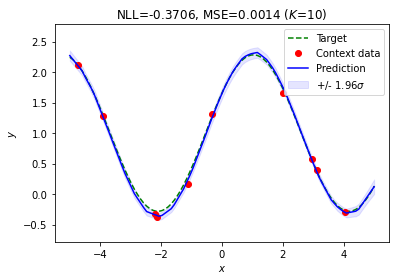

In [9]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["trained_mean"], 10, dataset_sines_infinite)

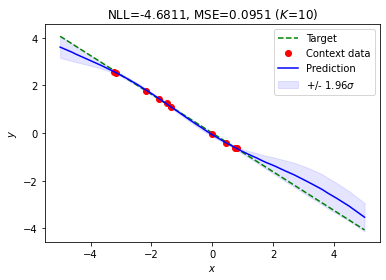

In [10]:
key, subkey = random.split(key)
plots.plot_notebooks(subkey, kernel, kernel_self, jac, output["trained_mean"], 10, dataset_lines_infinite)